In [ ]:
#Part 5
cleandata= pd.read_sql(''' SELECT CustomerID,
                   MAX(TransactionDate) AS last_transaction_date,
                   COUNT(*) AS count_transactions,
                   SUM([TransactionAmount (INR)]) AS totalprice
            FROM Transactions_Pas
            WHERE CustomerID IS NOT NULL
            GROUP BY CustomerID ''', conn)

# New Section

In [ ]:
cleandataNew= pd.read_sql(''' SELECT CustomerID, CustLocation,
                   MAX(TransactionDate) AS last_transaction_date,
                   COUNT(*) AS count_transactions,
                   SUM([TransactionAmount (INR)]) AS totalprice
            FROM Transactions_Pas
            WHERE CustomerID IS NOT NULL
            GROUP BY CustomerID ''', conn)

In [ ]:
cleandataNew['last_transaction_date'] = pd.to_datetime(cleandataNew['last_transaction_date'])
cleandataNew.dtypes

<ipython-input-133-ca63f419a5a6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleandataNew['last_transaction_date'] = pd.to_datetime(cleandataNew['last_transaction_date'])


,0
CustomerID,object
CustLocation,object
last_transaction_date,datetime64[ns]
count_transactions,int64
totalprice,float64


In [ ]:
cleandataNew = cleandataNew.drop(columns=['last_transaction_date', 'count_transactions', 'totalprice'])

In [ ]:
cleandataNew

,CustomerID,CustLocation
0,C1010011,DELHI
1,C1010012,MUMBAI
2,C1010014,MUMBAI
3,C1010018,CHAMPARAN
4,C1010028,DELHI
...,...,...
760819,C9099836,BHIWANDI
760820,C9099877,BANGALORE
760821,C9099919,GUNTUR
760822,C9099941,CHENNAI


# New Section Ended

In [ ]:
cleandata['last_transaction_date'] = pd.to_datetime(cleandata['last_transaction_date'])
cleandata.dtypes

<ipython-input-53-495f79a14056>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleandata['last_transaction_date'] = pd.to_datetime(cleandata['last_transaction_date'])


,0
CustomerID,object
last_transaction_date,datetime64[ns]
count_transactions,int64
totalprice,float64


In [ ]:
cleandata



,CustomerID,last_transaction_date,count_transactions,totalprice
0,C1010011,2016-09-08,2,5106.0
1,C1010012,2016-08-14,1,1499.0
2,C1010014,2016-07-08,2,1455.0
3,C1010018,2016-09-15,1,30.0
4,C1010028,2016-08-29,1,557.0
...,...,...,...,...
760819,C9099836,2016-07-08,1,691.0
760820,C9099877,2016-09-15,1,222.0
760821,C9099919,2016-08-18,1,126.0
760822,C9099941,2016-08-28,1,50.0


In [ ]:
# Write clean CRM data into the database
cleandata.to_sql("cleandata", conn)

760824

In [ ]:
import numpy as np
import datetime
cleandata["last_transaction_date"] = cleandata["last_transaction_date"].dt.date
print(cleandata['last_transaction_date'].max())



2016-12-09


In [ ]:
# Create snapshot date
snapshot_date = cleandata['last_transaction_date'].max() + datetime.timedelta(days=1)
print(snapshot_date)

2016-12-10


In [ ]:
# Aggregate data by each customer
customers = cleandata.groupby(['CustomerID']).agg({
   'last_transaction_date': lambda x: (snapshot_date - x.max()).days,
   'count_transactions':'sum' ,
   'totalprice': 'sum'})

In [ ]:
print(cleandata['last_transaction_date'].max())

2016-12-09


In [ ]:
# Rename columns
customers.rename(columns = {'last_transaction_date': 'Recency',
                            'count_transactions': 'Frequency',
                            'totalprice': 'MonetaryValue'}, inplace=True)

In [ ]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
C1010011,93,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010028,103,1,557.0
...,...,...,...
C9099836,155,1,691.0
C9099877,86,1,222.0
C9099919,114,1,126.0


In [ ]:
customers['Frequency'].max()

6

In [ ]:
customers['Recency'].max()

337

Text(0.5, 1.0, 'Histogram of Recency')

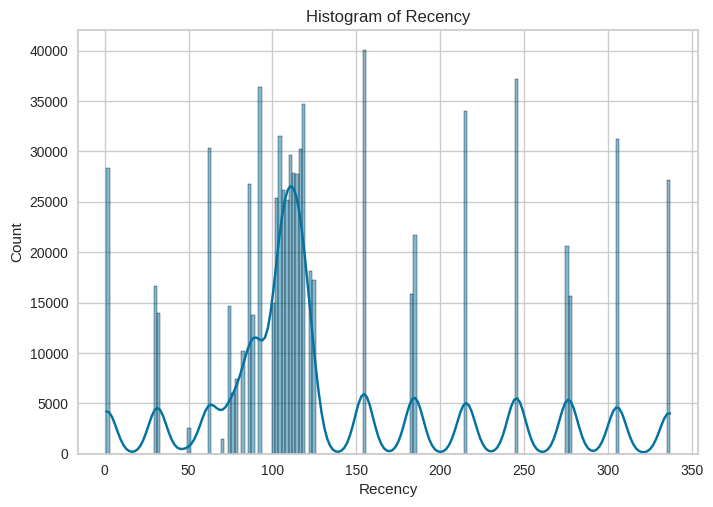

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='Recency', kde=True)
ax.set_title('Histogram of Recency')

Text(0.5, 1.0, 'Histogram of Frequency')

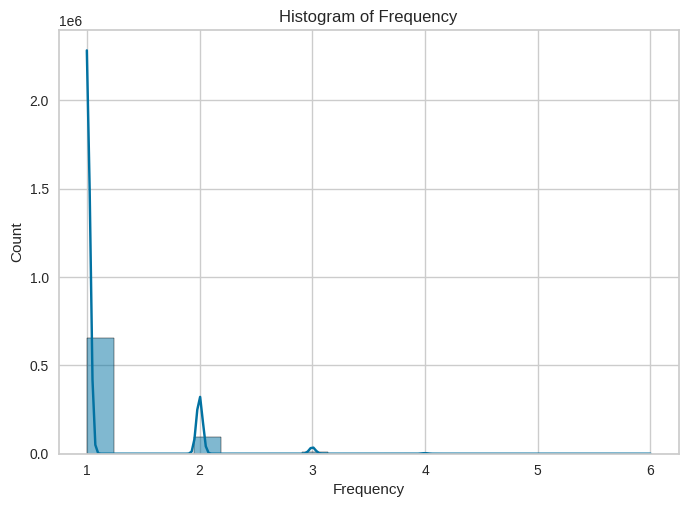

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=customers, x='Frequency', kde=True)
ax.set_title('Histogram of Frequency')

Text(0.5, 1.0, 'Histogram of MonetaryValue')

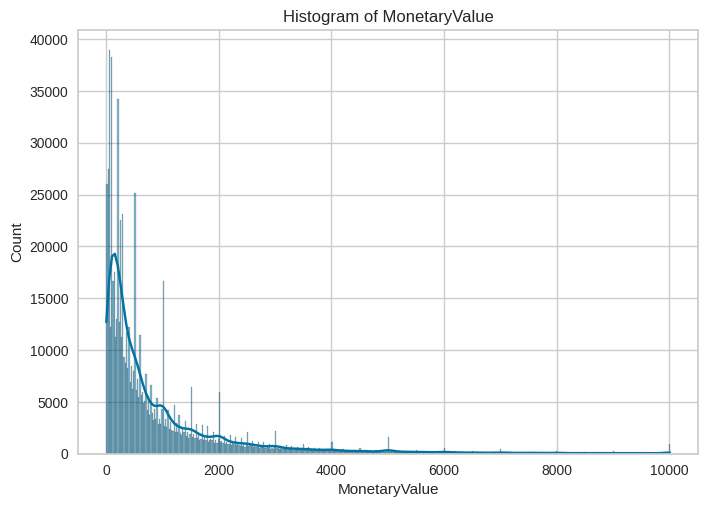

In [ ]:
outliers_removed = customers[customers['MonetaryValue'] < customers['MonetaryValue'].quantile(0.98)]

fig, ax = plt.subplots()
sns.histplot(data=outliers_removed, x='MonetaryValue', kde=True)
ax.set_title('Histogram of MonetaryValue')

In [ ]:
# check missing values
cleandata.isna().sum()

,0
CustomerID,0
last_transaction_date,0
count_transactions,0
totalprice,0


<ipython-input-120-a7e08f6e9151>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
<ipython-input-120-a7e08f6e9151>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
<ipython-input-120-a7e08f6e9151>:8: UserWa

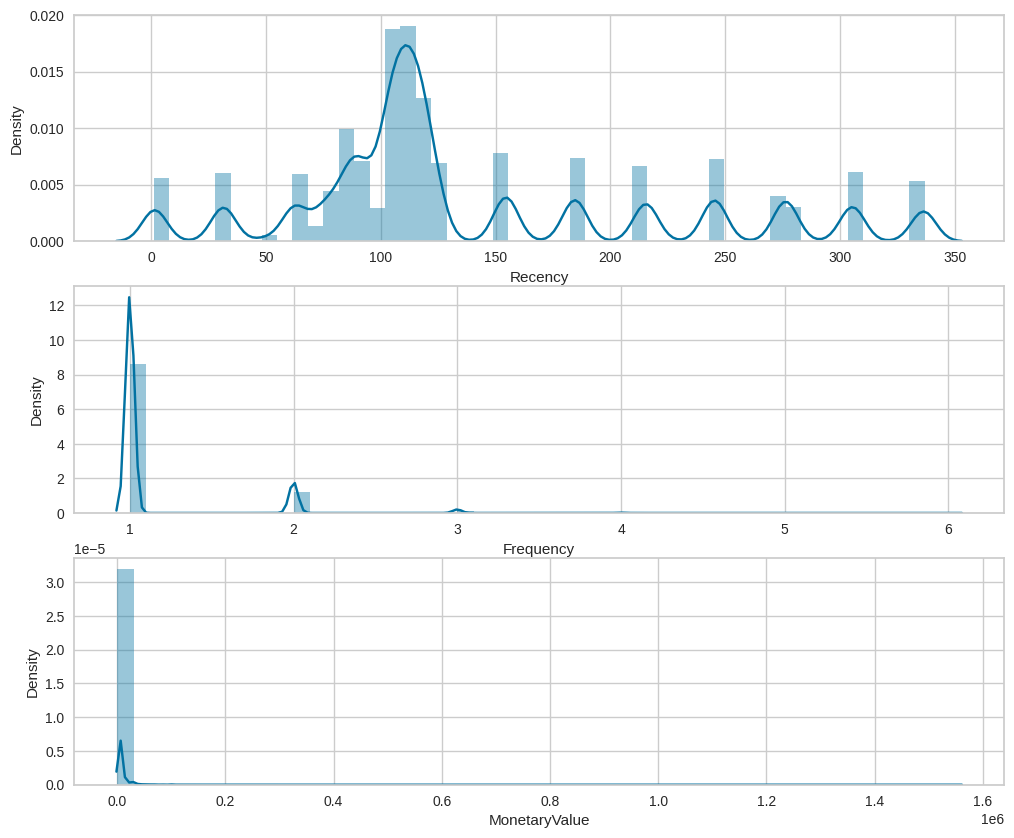

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

,Recency,Frequency,MonetaryValue
760819,30.225682,0.0,7.667719
760820,21.000061,0.0,6.159579
760821,25.023931,0.0,5.437161
760822,23.640561,0.0,4.299268
760823,19.431919,0.0,7.959754


<ipython-input-122-edbcbb4b2927>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
<ipython-input-122-edbcbb4b2927>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
<ipython-input-122-edbcbb4b2927>:8

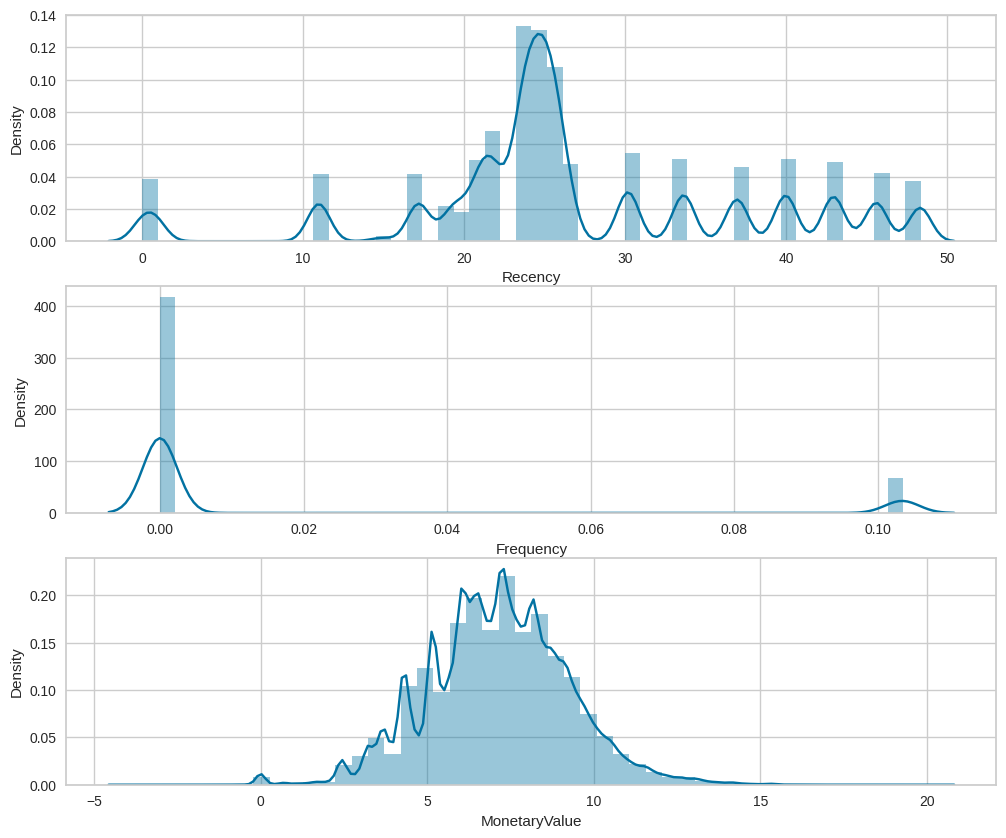

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
#Standardizing the metrics (R,F,M)
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0.  0.  0.]
[1. 1. 1.]
